# Anime Rating Predictions From 1907 to 2020

Project by Muhammad Farras Rizki

## A. Latar Belakang

Anime adalah animasi asal Jepang yang digambar dengan tangan maupun menggunakan teknologi komputer. Judul anime pertama di dunia adalah Katsudo Shashin. Anime ini diperkirakan muncul di Jepang pada tahun 1907. Anime pertama yang mencapai kepopuleran yang luas adalah Astro Boy karya Ozamu Tezuka pada 1963. Sejak saat itu anime mulai berkembang dan banyak dikenal oleh masyarakat luas.

## B. Tentang Dataset

Dataset berisi 14578 baris dan 18 kolom. Baris dalam dataset ini merepresentasikan informasi dari suatu anime beserta ratingnya. Informasi tersebut meliputi media penayangan, jumlah episode, genre, tahun produksi, jumlah penonton hingga rating. Rating yang digunakan memiliki range nilai dari 0 hingga 5.

## C. Tujuan Project : 

1. Memprediksi rating suatu anime menggunakan model regresi
2. Memberikan insight pada orang yang akan memproduksi anime, mengenai faktor apa saja yang berkontribusi pada rating suatu anime

## D. Sumber Dataframe

- Source : https://www.kaggle.com/datasets/alancmathew/anime-dataset
- Informasi yang ada pada dataset ini diambil dari https://www.anime-planet.com/ pada tanggal 15 Juni 2020

## E. Deskripsi Pemodelan
Tujuan dari pemodelan adalah ingin membuat model yang mampu memprediksi rating suatu anime. Model yang akan digunakan adalah jenis Regression. Target Variabel yang akan digunakan adalah kolom rating.


Model Machine Learning yang akan diuji antara lain:
1. Linier Regression
    - Normal Regression
    - Ridge
    - LASSO
2. Random Forest Regression

# Data Preparation

## 1. Import Library

In [1]:
## Komputasi
import pandas as pd
import numpy as np

## Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

## Multicollinearity
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

## Scaling data
from sklearn.preprocessing import StandardScaler

## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Modeling
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

## Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

    ### QQ Plot
import statsmodels.api as sm
    ### R2 Score
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore')

## 2. Import Dataset

In [2]:
anime = pd.read_csv('anime.csv')

In [3]:
anime.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


Konklusi :
    
- Kolom `title` merupakan primary key dari dataset anime
- Kolom yang akan digunakan sebagai target variabel adalah `rating`

## 3. Data Inspection

In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         14578 non-null  object 
 1   mediaType     14510 non-null  object 
 2   eps           14219 non-null  float64
 3   duration      9137 non-null   float64
 4   ongoing       14578 non-null  bool   
 5   startYr       14356 non-null  float64
 6   finishYr      14134 non-null  float64
 7   sznOfRelease  3767 non-null   object 
 8   description   8173 non-null   object 
 9   studios       14578 non-null  object 
 10  tags          14578 non-null  object 
 11  contentWarn   14578 non-null  object 
 12  watched       14356 non-null  float64
 13  watching      14578 non-null  int64  
 14  wantWatch     14578 non-null  int64  
 15  dropped       14578 non-null  int64  
 16  rating        12107 non-null  float64
 17  votes         12119 non-null  float64
dtypes: bool(1), float64(7), in

Konklusi :
    
- Dataset anime terdiri dari 14578 baris dan 18 kolom
- Baris dalam dataset anime merepresentasikan informasi dari 1 judul anime dan hasil ratingnya
- Kolom pada dataset anime memiliki 4 variasi tipe data, antara lain :
  1. object, dengan jumlah 7 kolom 
  2. float64, dengan jumlah 7 kolom
  3. int64, dengan jumlah 3 kolom 
  4. bool, dengan jumlah 1 kolom 
- Dataset anime memiliki missing values

In [5]:
## Cek unique values pada Dataframe
for x in anime.columns : 
    print (f'===== {x} =====')
    print (f'{anime[x].unique()}')
    print()

===== title =====
['Fullmetal Alchemist: Brotherhood' 'your name.' 'A Silent Voice' ...
 'Minagoroshi' 'Kurayukaba' 'YOASOBI: Harujion']

===== mediaType =====
['TV' 'Movie' 'Web' 'TV Special' 'OVA' nan 'DVD Special' 'Other'
 'Music Video']

===== eps =====
[6.400e+01 1.000e+00 1.000e+01 2.600e+01 2.500e+01 1.480e+02 5.100e+01
 1.300e+01 2.400e+01 1.200e+01 2.200e+01 1.100e+01 1.400e+01 7.500e+01
 3.900e+01 8.200e+01 3.000e+00 4.000e+00 1.500e+01 8.000e+00 2.000e+00
 4.300e+01 1.100e+02 3.700e+01 5.000e+00 2.700e+01 1.200e+02 2.300e+01
 7.400e+01 6.000e+00 5.000e+01 9.290e+02 9.900e+01 5.200e+01 1.020e+02
 2.010e+02 6.200e+01 2.100e+01 9.400e+01 9.000e+00 4.700e+01 4.000e+01
 7.000e+00 1.120e+02 1.750e+02 1.600e+01 2.800e+01 3.800e+01 3.300e+01
 1.010e+02 5.000e+02 4.800e+01 4.200e+01 6.100e+01 2.030e+02 1.030e+02
 2.910e+02 3.600e+01 8.000e+01 1.530e+02 1.040e+02 9.600e+01 1.900e+01
 6.300e+01 6.000e+01 4.500e+01 2.000e+01 7.700e+01 9.740e+02 1.450e+02
 3.660e+02 4.900e+01 1.310e+02 6

Konklusi :
- Kolom `title` dan `studios` dapat dihapus karena terlalu banyak memiliki unique values berupa text, sehingga tidak terlalu membantu dalam pembuatan regression model
- Pilih 1 genre pertama pada kumpulan data kolom `tags`, kemudian anggap sebagai genre utama
- Kolom `contentWarn` dapat dirubah menjadi boolean, dengan pengkategorian sebagai berikut :
    - 0 : Judul yang tidak memiliki peringatan
    - 1 : Judul yang memiliki peringatan
- Ubah format decimal pada kolom `eps`, `duration`, `startYr`, `finishYr`,`watched` dan `votes` menjadi angka biasa

## 4. Data Cleaning

### 4.1 Check Duplicate Rows

In [6]:
# Cek duplikasi pada Dataframe
anime.duplicated().sum()

0

Konklusi : Dataframe anime tidak memiliki baris yang duplikat

### 4.2 Check Missing Values

In [7]:
# Cek missing values
(anime.isna().sum() * 100 / len(anime))

title            0.000000
mediaType        0.466456
eps              2.462615
duration        37.323364
ongoing          0.000000
startYr          1.522843
finishYr         3.045685
sznOfRelease    74.159693
description     43.936068
studios          0.000000
tags             0.000000
contentWarn      0.000000
watched          1.522843
watching         0.000000
wantWatch        0.000000
dropped          0.000000
rating          16.950199
votes           16.867883
dtype: float64

Konklusi :
- Kolom `sznOfRelease` dan `description` memiliki persentase missing values >40% dari total data, maka kedua kolom tersebut dapat dihapus
- Kolom `duration` dan `votes` memiliki persentase missing values >10% dan <40% dari total data, maka kedua kolom tersebut dapat diatasi dengan melakukan imputasi menggunakan median (karena keduanya data numerical)
- Kolom `mediaType`,`eps`,`startYr`,`finishYr` dan `watched` memiliki persentase missing values <10% dari total data, maka kolom-kolom tersebut dapat diatasi dengan menghapus baris yang mengandung missing values
- Khusus kolom `rating` yang merupakan target variabel, karena jumlah missing values <30% maka dapat langsung dihapus barisnya mengingat jumlah data yang dimiliki cukup banyak, dan juga untuk menghindari bias dari modeling

In [8]:
# Handling Missing Values

# Missing Values > 40%
anime.drop(['sznOfRelease', 'description'], axis = 'columns', inplace = True)

# Missing Values 10-40%
anime[['duration','votes']] = anime[['duration','votes']].fillna(anime[['duration','votes']].median())

# Missing Values < 10% dan target variabel
anime = anime.dropna(axis=0)

### 4.3 Cleaning Tags Colum

In [9]:
## Hapus karakter yang tidak diperlukan

anime['tags'] = anime['tags'].replace(',','', regex=True)
anime['tags'] = anime['tags'].replace("'","", regex=True)
anime['tags'] = anime['tags'].replace('\[','', regex=True)
anime['tags'] = anime['tags'].replace('\]','', regex=True)

In [10]:
## Select 1 kata pertama di `tags`
anime['tags'] = anime['tags'].str.split(' ').str[0]

In [11]:
## Replace blank space to NaN
anime['tags'] = anime['tags'].apply(lambda x: x.strip()).replace('', np.nan)

In [12]:
## Delete Missing Values on `tags`
anime = anime.dropna(axis=0)

### 4.4 Column Encoding

In [13]:
## `contentWarn` Encoding
def warning(x):
    if x == '[]':
        return 0
    else:
        return 1
    
anime['contentWarn'] = np.vectorize(warning)(anime['contentWarn'])

### 4.5 Delete Decimal Format

In [14]:
anime[['duration', 'eps', 'startYr', 'finishYr','watched','votes']] = anime[['duration', 'eps', 'startYr', 'finishYr','watched','votes']].astype(int)

### 4.6 Drop Column

In [15]:
## Drop Column `studios`
anime = anime.drop(['studios'],axis=1)

In [16]:
## Buat dataset baru untuk Deep dive question (tanpa hapus outliers + dengan `title`)
df = anime.copy()

In [17]:
## Drop Column `title`
anime = anime.drop(['title'],axis=1)

### Konkusli

In [18]:
## Cek unique values pada Dataframe
for x in anime.columns : 
    print (f'===== {x} =====')
    print (f'{anime[x].unique()}')
    print()

===== mediaType =====
['TV' 'Movie' 'TV Special' 'OVA' 'Web' 'DVD Special' 'Other' 'Music Video']

===== eps =====
[  64    1   10   26   25  148   51   13   24   12   22   11   14   75
   39    3    4   15    8    2   43  110   37   27  120   23   74    6
   50   99   52  102  201   62    5   94    9   47   40  112  175    7
   16   28   38   33  101  500   48   42   61  203  103  291   21   36
  153  104   96   19   63   60   45   20   77  145  366   49  131   69
  100   17  220  155   70   18   72   97  178   79  161   30  167   31
   35  358  147   34   46   78   73  114  142   54  109  113  124  373
  127   93   59   41   44   76  119   65  195  137  224   87   58   66
  146   53  276  258  105   32  115  694   92  151   56   86  243  154
  128   29  330  150   55   88 1787  192  296  143  191  108  182  193
   84   95  180  526  170   80  199  172  117  214   83  136   91  164
  283   68  331  260  130  163  305  726 1471  510  139  162  237  227
  200  135 1428  156 1818   90  7

Konklusi :
- Kolom `ongoing` hanya memiliki 1 unique values, maka kolom tersebut dapat dihapus

In [19]:
## Drop Column `ongoing`
anime = anime.drop(['ongoing'],axis=1)

In [20]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11610 entries, 0 to 13373
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mediaType    11610 non-null  object 
 1   eps          11610 non-null  int32  
 2   duration     11610 non-null  int32  
 3   startYr      11610 non-null  int32  
 4   finishYr     11610 non-null  int32  
 5   tags         11610 non-null  object 
 6   contentWarn  11610 non-null  int32  
 7   watched      11610 non-null  int32  
 8   watching     11610 non-null  int64  
 9   wantWatch    11610 non-null  int64  
 10  dropped      11610 non-null  int64  
 11  rating       11610 non-null  float64
 12  votes        11610 non-null  int32  
dtypes: float64(1), int32(7), int64(3), object(2)
memory usage: 952.4+ KB


Konklusi :
Setelah dilakukan proses data cleaning
- Dimensi dari dataset anime menjadi 11923 baris dan 13 kolom
- Dataset anime tidak memiliki missing values

# Exploratory Data Analysis

## 5. Spliting Data Train dan Test

In [21]:
# Splitting data train and testing (70%,30%)

X = anime.drop('rating',axis=1).copy()
y = anime['rating'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [22]:
# Insert target variabel pada X_train untuk memudahkan EDA
X_train['rating'] = y_train

In [23]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (8127, 13)
X_test : (3483, 12)
y_train : (8127,)
y_test : (3483,)


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8127 entries, 1482 to 7511
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mediaType    8127 non-null   object 
 1   eps          8127 non-null   int32  
 2   duration     8127 non-null   int32  
 3   startYr      8127 non-null   int32  
 4   finishYr     8127 non-null   int32  
 5   tags         8127 non-null   object 
 6   contentWarn  8127 non-null   int32  
 7   watched      8127 non-null   int32  
 8   watching     8127 non-null   int64  
 9   wantWatch    8127 non-null   int64  
 10  dropped      8127 non-null   int64  
 11  votes        8127 non-null   int32  
 12  rating       8127 non-null   float64
dtypes: float64(1), int32(7), int64(3), object(2)
memory usage: 666.7+ KB


Konklusi :
- Data X_train memiliki 8346 baris dan 13 kolom (12 feature dan 1 target variabel / `rating`)

## 6. Variable Target Analysis

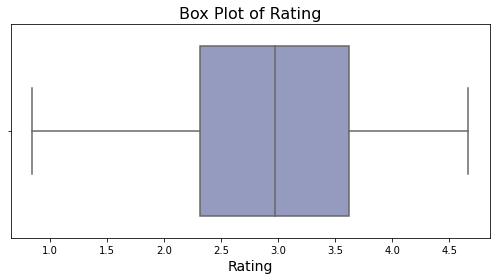

In [25]:
## Check Outliers (Box plot) 
plt.figure(figsize=(7,4))
sns.boxplot(data=X_train,x='rating', palette="BuPu_r")
plt.title('Box Plot of Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.tight_layout()

In [26]:
## Peak Data Rating
q1 = anime['rating'].quantile(0.25)
q3 = anime['rating'].quantile(0.75)
print ('Peak nilai rating berkisar antara', q1, 'sampai dengan', q3)

Peak nilai rating berkisar antara 2.318 sampai dengan 3.62575


Konklusi :
- Kolom `rating` tidak memiliki outliers
- Peak data dari kolom `rating` berkisar antara 2,3 - 3,6

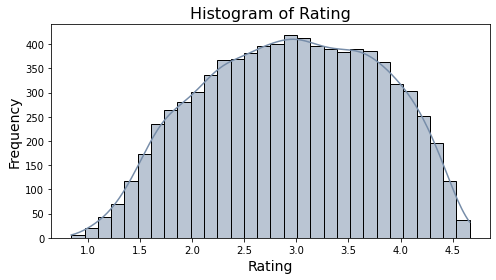

In [27]:
## Data Distribution (Histogram)
plt.figure(figsize=(7,4))
sns.histplot(data=X_train,x='rating',kde=True, color='#778da9')
plt.title('Histogram of Rating',fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()

Konklusi :
- Distribusi data kolom `rating` sudah cukup simetris

## 7. Descriptive Statistic

In [28]:
# Mengkategorikan kolom berdasarkan tipe datanya
numericals = X_train.select_dtypes(include=["int","float"]).columns
categoricals = X_train.select_dtypes("object").columns

print("Kolom numericals terdiri dari {}".format(numericals.to_list()))
print("Kolom categoricals terdiri dari {}".format(categoricals.to_list()))

Kolom numericals terdiri dari ['eps', 'duration', 'startYr', 'finishYr', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'votes', 'rating']
Kolom categoricals terdiri dari ['mediaType', 'tags']


In [29]:
# Hapus target variabel dari kelompok numericals
numericals = numericals.drop(['rating'])

In [30]:
# Numericals Statistical Summary
X_train[numericals].describe()

,eps,duration,startYr,finishYr,contentWarn,watched,watching,wantWatch,dropped,votes
count,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000
mean,12.186293,18.508429,2005.461794,2005.717977,0.119109,2856.473483,238.800295,1216.816168,151.076904,2075.031500
std,41.007638,26.467096,14.438237,14.368552,0.323937,7529.618047,1023.343334,2285.299690,488.423264,5731.011471
min,1.000000,1.000000,1917.000000,1917.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,1.000000,5.000000,2001.000000,2001.000000,0.000000,57.000000,2.000000,52.000000,3.000000,35.000000
50%,2.000000,8.000000,2010.000000,2010.000000,0.000000,356.000000,14.000000,312.000000,12.000000,232.000000
75%,12.000000,15.000000,2015.000000,2015.000000,0.000000,2107.500000,98.000000,1308.000000,67.000000,1446.500000
max,1818.000000,163.000000,2020.000000,2020.000000,1.000000,119474.000000,46914.000000,28541.000000,19481.000000,97965.000000


Konklusi :
- Tidak ada anomali pada nilai minimum dan maximum data numericals
- Kolom `startYr` dan `finishYr` diprediksi memiliki distribusi data **normal**, karena nilai mean tidak beda jauh dari median (selisih <15%)
- Kolom `eps`, `duration`, `watched`, `watching`, `wantWatch`, `dropped` dan `votes` diprediksi memiliki distribusi data **positive skew**, karena nilai mean lebih dari median (selisih >15%)
- Kolom `contentWarn` merupakan data boolean dengan nilai 0 dan 1

In [31]:
# Categoricals Descriptive Summary

X_train[categoricals].describe()

,mediaType,tags
count,8127,8127
unique,8,157
top,TV,Action
freq,2682,1931


Konklusi :
- Terdapat 8 jenis media penayangan dan 154 jenis genre dalam dataset anime 
- Dari 8 jenis media, media yang paling sering digunakan untuk menonton anime adalah TV
- Anime dengan genre action memiliki populasi tertinggi pada dataset ini

## 8. Univariate Analysis

### 8.1 Cek Outliers
Mendeteksi adanya outliers menggunakan Boxplot

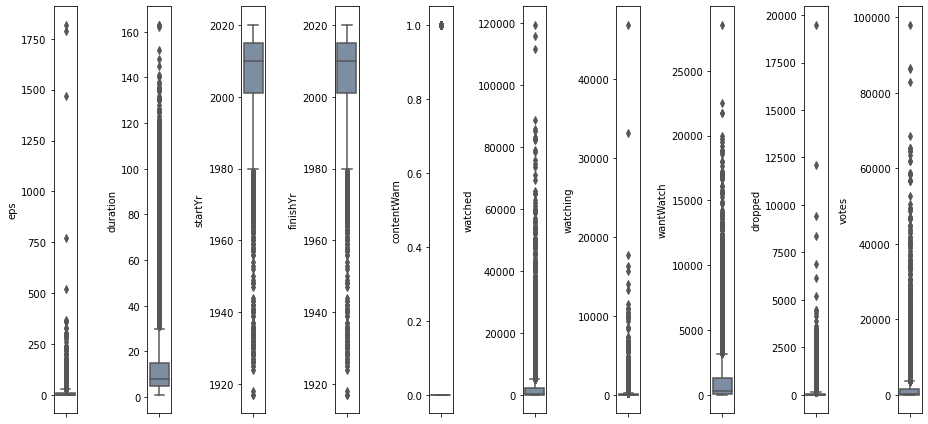

In [32]:
plt.figure(figsize=(13,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=X_train[features[i]], color='#778da9')
    plt.tight_layout()

Konklusi :
- Semua kolom memiliki outliers
- Untuk mempertahankan bagian alami dari populasi, maka hanya akan menghapus outliers yang memisah sangat jauh dari distribusi normal. Maka akan tetap mempertahankan nilai pada kolom sebagai berikut :
    1. eps < 500
    2. startYr > 1920
    3. finishYr > 1920
    4. watched < 95000
    5. watching < 12500
    6. wantWatch < 20000
    7. dropped < 4000
    8. votes < 70000
- Kolom `duration` tidak memiliki outliers yang memisah jauh dari distribusi normal, maka outliers tidak ada yang dihapus
- Kolom `contentWarn` merupakan data boolean, maka outliers tidak perlu dihapus

In [33]:
## Hapus Outliers pada dataset 'outliers'

X_train = X_train[X_train.eps < 500]
X_train = X_train[X_train.startYr > 1920]
X_train = X_train[X_train.finishYr > 1920]
X_train = X_train[X_train.watched < 95000]
X_train = X_train[X_train.watching < 12500]
X_train = X_train[X_train.wantWatch < 20000]
X_train = X_train[X_train.dropped < 4000]
X_train = X_train[X_train.votes < 70000]

In [34]:
## Samakan index data pada y_train
y_train = y_train[X_train.index]

### 8.2 Cek Distribution
Cek distribusi tiap kolom menggunakan KDE plot

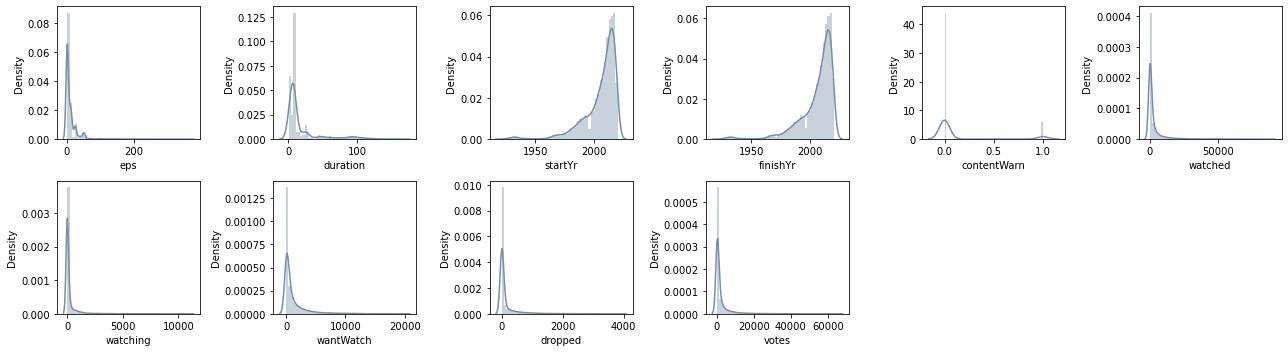

In [35]:
plt.figure(figsize=(18,5))
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=X_train[features[i]], color='#778da9')
    plt.xlabel(features[i])
    plt.tight_layout()

Konklusi :
- Kolom `eps`, `duration`, `watched`, `watching`, `wantWatch`, `dropped` dan `votes` memiliki distribusi data yang tidak normal. Kolom-kolom tersebut terdistribusi secara **positive skew**, maka perlu dilakukan log transformasi
- Kolom `startYr` dan `finishYr` memiliki distribusi **negative skew**, maka perlu dilakukan log transformasi
- Kolom `contentWarn` merupakan kolom boolean, maka tidak perlu dilakukan log transformasi meskipun distribusi datanya tidak normal

## 9. Multivariate Analysis

### 9.1 Correlation heatmap

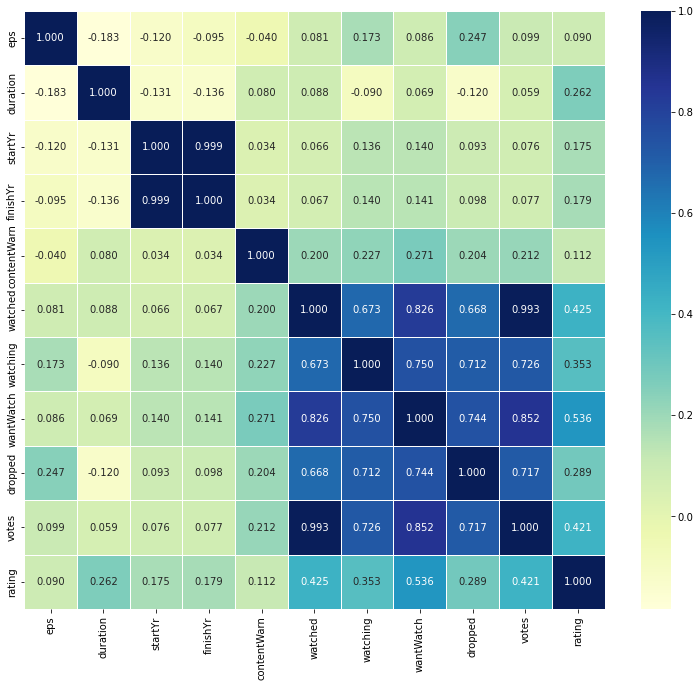

In [36]:
fig, ax = plt.subplots(figsize = (13, 11))
sns.heatmap(X_train.corr(),cbar=True,annot=True,linewidths=0.5,ax=ax,fmt='.3f',cmap="YlGnBu")
plt.show()

Konklusi :
- Feature yang memiliki korelasi terhadap target variabel adalah (tinggi-sedang >0,2) :
   1. `wantWatch`, dengan korelasi sebesar 0,53
   2. `watched`, dengan korelasi sebesar 0,42
   3. `votes`, dengan korelasi sebesar 0,42
   4. `watching`, dengan korelasi sebesar 0,36
   5. `dropped`, dengan korelasi sebesar 0,29
   6. `duration`, dengan korelasi sebesar 0,26
- Ada beberapa feature yang saling memiliki korelasi tinggi (Multicollinearity)
- Feature yang memiliki korelasi paling tinggi adalah `finishYr` dan `startYr` dengan korelasi sebesar 0,998. Maka dapat dinyatakan bahwa, semakin tinggi tahun dimulainya produksi suatu anime akan semakin tinggi pula tahun selesainya produksi anime tersebut. Dengan kata lain, mayoritas anime dari dataset ini memiliki durasi produksi yang singkat

### 9.2 Analysis Variable Target and Feature

### 9.2.1 Rating and WantWatch

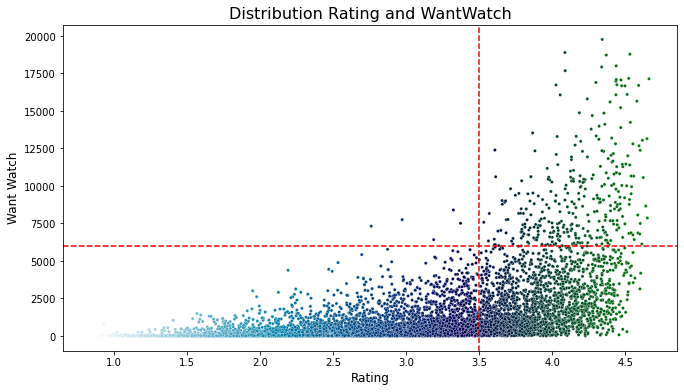

In [37]:
plt.figure(figsize=(11,6))
sns.scatterplot(x=X_train['rating'],y=X_train['wantWatch'], s=10, c=X_train.rating, cmap='ocean_r')
plt.title('Distribution Rating and WantWatch', fontsize=16)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Want Watch', fontsize = 12)
plt.axhline(y = 6000, color = 'r', linestyle = '--')
plt.axvline(x = 3.5, color = 'r', linestyle = '--')
plt.show()

Konklusi :

- Kolom `rating` dan `wantWatch` memiliki korelasi positive
- Semakin banyak user yang menyimpan anime dalam daftar yang ingin dilihat, maka akan semakin besar peluang anime tersebut untuk mendapatkan rating yang tinggi
- Jika dilihat dari scatterplot, dapat dinyatakan bahwa anime yang masuk dalam daftar ingin dilihat oleh lebih dari 6000 user, memiliki peluang untuk mendapatkan rating lebih dari 3,5 

### 9.2.2 Rating and Watched

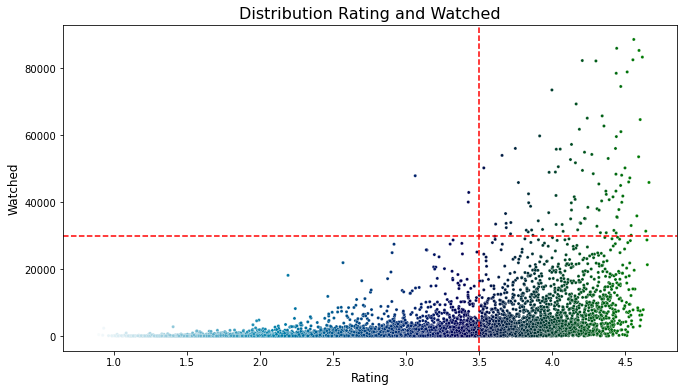

In [38]:
plt.figure(figsize=(11,6))
sns.scatterplot(x=X_train['rating'],y=X_train['watched'], s=10, c=X_train.rating, cmap='ocean_r')
plt.title('Distribution Rating and Watched', fontsize=16)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Watched', fontsize = 12)
plt.axhline(y = 30000, color = 'r', linestyle = '--')
plt.axvline(x = 3.5, color = 'r', linestyle = '--')
plt.show()

Konklusi :

- Kolom `rating` dan `watched` memiliki korelasi positive
- Semakin banyak user yang sudah menonton anime tersebut, maka akan semakin besar peluang anime tersebut untuk mendapatkan rating yang tinggi
- Jika dilihat dari scatterplot, dapat dinyatakan bahwa anime yang telah ditonton oleh lebih dari 30000 user, memiliki peluang untuk mendapatkan rating lebih dari 3,5 

### 9.2.3 Rating and Votes

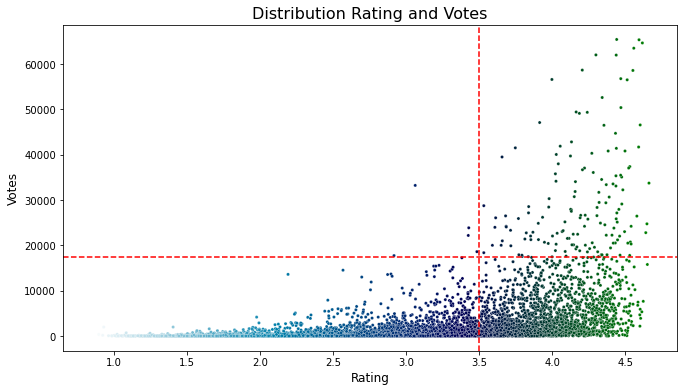

In [39]:
plt.figure(figsize=(11,6))
sns.scatterplot(x=X_train['rating'],y=X_train['votes'], s=10, c=X_train.rating, cmap='ocean_r')
plt.title('Distribution Rating and Votes', fontsize=16)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Votes', fontsize = 12)
plt.axhline(y = 17500, color = 'r', linestyle = '--')
plt.axvline(x = 3.5, color = 'r', linestyle = '--')
plt.show()

Konklusi :

- Kolom `rating` dan `votes` memiliki korelasi positive
- Semakin banyak user yang melakukan votes pada suatu anime, maka akan semakin besar peluang anime tersebut untuk mendapatkan rating yang tinggi
- Jika dilihat dari scatterplot, dapat dinyatakan bahwa anime yang telah divotes oleh lebih dari 17500 user, memiliki peluang untuk mendapatkan rating lebih dari 3,5

### 9.2.4 Rating and Watching

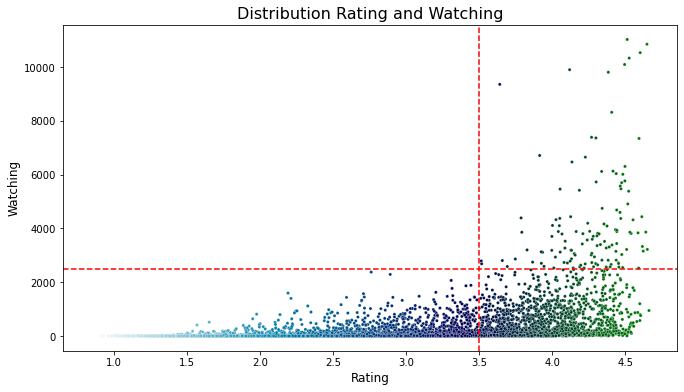

In [40]:
plt.figure(figsize=(11,6))
sns.scatterplot(x=X_train['rating'],y=X_train['watching'], s=10, c=X_train.rating, cmap='ocean_r')
plt.title('Distribution Rating and Watching', fontsize=16)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Watching', fontsize = 12)
plt.axhline(y = 2500, color = 'r', linestyle = '--')
plt.axvline(x = 3.5, color = 'r', linestyle = '--')
plt.show()

Konklusi :

- Kolom `rating` dan `watching` memiliki korelasi positive
- Semakin banyak user yang sedang menonton suatu anime, maka akan semakin besar peluang anime tersebut untuk mendapatkan rating yang tinggi
- Jika dilihat dari scatterplot, dapat dinyatakan bahwa anime yang sedang ditonton oleh lebih dari 2500 user, memiliki peluang untuk mendapatkan rating lebih dari 3,5

### 9.2.5 Rating and MediaType

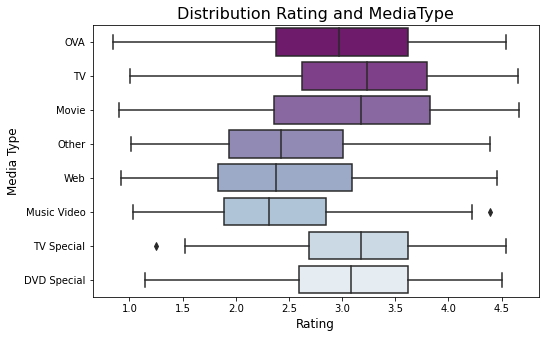

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x=X_train['rating'],y=X_train['mediaType'], palette="BuPu_r")
plt.title('Distribution Rating and MediaType', fontsize=16)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Media Type', fontsize = 12)
plt.show()

Konklusi :
- Jenis media penanyangan yang memiliki rata-rata rating anime paling tinggi adalah TV Special, kemudian disusul oleh TV dan Movie
- Jenis media penanyangan yang memiliki rata-rata rating anime paling rendah adalah Music Video

### 9.2.6 Rating and ContentWarn

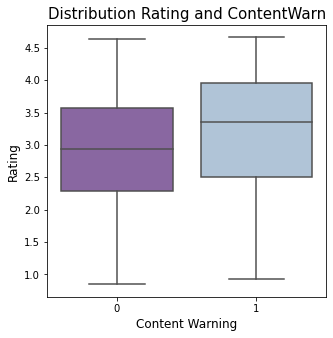

In [42]:
plt.figure(figsize=(5,5))
sns.boxplot(y=X_train['rating'],x=X_train['contentWarn'], palette="BuPu_r")
plt.title('Distribution Rating and ContentWarn', fontsize=15)
plt.xlabel('Content Warning', fontsize = 12)
plt.ylabel('Rating', fontsize = 12)
plt.show()

Konklusi :

Anime yang memiliki peringatan / penontonnya dibatasi pada umur tertentu (`contentWarning`) lebih sering mendapatkan rating yang sedikit lebih tinggi dibandingkan dengan anime yang tidak memilki `contentWarning`    

# Deep Dive Question

## 10. Deep Dive Question

In [43]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64,8,False,2009,2010,Action,1,103707,14351,25810,2656,4.702,86547
1,your name.,Movie,1,107,False,2016,2016,Drama,0,58831,1453,21733,124,4.663,43960
2,A Silent Voice,Movie,1,130,False,2016,2016,Drama,1,45892,946,17148,132,4.661,33752
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10,8,False,2016,2016,Shounen,0,25134,2183,8082,167,4.660,17422
4,Attack on Titan 3rd Season: Part II,TV,10,8,False,2019,2019,Action,1,21308,3217,7864,174,4.650,15789


In [44]:
## Drop kolom `ongoing`

df = df.drop(['ongoing'],axis=1)

## 1) Tren Produksi Anime Pada Tahun 1907 - 2020

In [45]:
## Jumlah anime tiap tahun

df_year = df.groupby('startYr').agg(
    count_title = ('title','count')
).reset_index()

df_year.sort_values(['count_title'], ascending=[False]).head()

,startYr,count_title
94,2017,712
93,2016,695
91,2014,687
95,2018,673
92,2015,643


Text(0.5, 1.0, 'Distribution of Anime Production on 1907 to 2020')

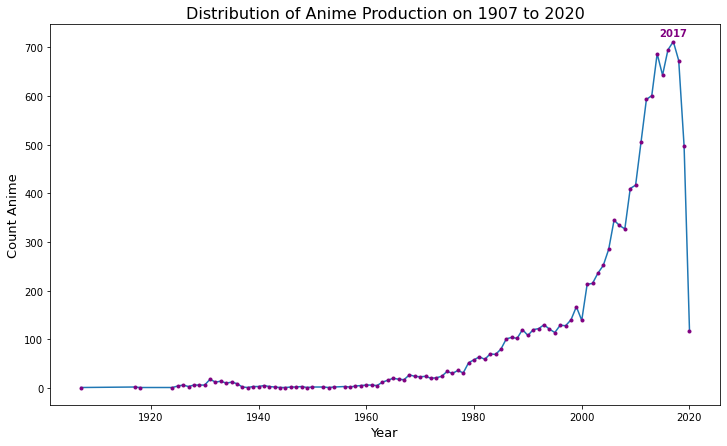

In [46]:
# Adjust the figure size
fig = plt.figure(figsize = (12, 7))

# Line chart
plt.plot(df_year['startYr'], df_year['count_title'], 
         marker='o', markersize=3, markeredgecolor='purple', markerfacecolor='purple')

# Text
plt.text(x=2017, y=730, s='2017', rotation=0, color = 'purple', fontsize=10, va='center', ha='center', weight='bold')

# Set labels and title
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Count Anime', fontsize = 13)
plt.title('Distribution of Anime Production on 1907 to 2020', fontsize = 16)

Konklusi :

- Produksi anime konstan pada tahun 1907 hingga 1960. Kemudian pada tahun 1960 perlahan-lahan produksi anime mulai meningkat sampai tahun 2000. Setelah tahun 2000 produksi anime mulai meningkat signifikan hingga tahun 2020 dengan adanya sedikit penurunan pada beberapa tahun.
- Produksi anime tertinggi berada pada tahun 2017 dengan jumlah anime sebanyak 712 judul
- Untuk meningkatkan relevansi minat penonton terhadap anime, maka akan diambil data anime dari 10 tahun terakhir saja (2011-2020)

In [47]:
df_2011 = df[df['startYr'] > 2010]

## 2) Media Type apa yang memiliki rata-rata rating tertinggi pada tahun 2011 - 2020 ?

In [48]:
## Agregasi Kolom `mediaType`

best_media = (df_2011
    .groupby('mediaType')
    .agg(rating_tot=('rating','mean'))
    .reset_index())

best_media = best_media.sort_values(['rating_tot'], ascending=[True])
best_media

,mediaType,rating_tot
4,Other,2.454529
2,Music Video,2.469667
7,Web,2.535969
6,TV Special,3.036424
0,DVD Special,3.089874
5,TV,3.227437
3,OVA,3.400685
1,Movie,3.526265


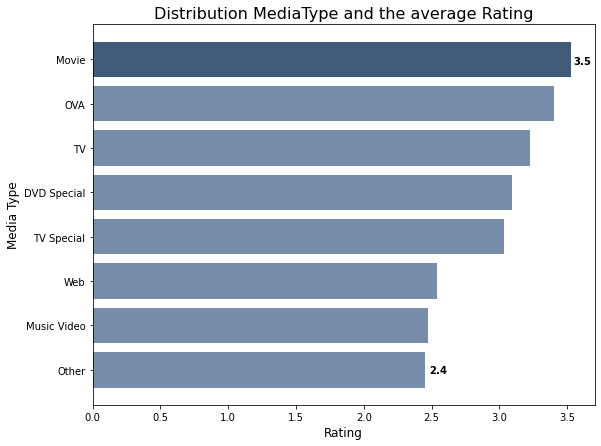

In [49]:
## Grafik rata-rata rating

x = best_media['mediaType']
y = best_media['rating_tot']
list_color = ['#778da9', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9', '#415a77']
plt.figure(figsize=(9,7))
plt.barh(x, y, color=list_color)
plt.title('Distribution MediaType and the average Rating', fontsize=16)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Media Type', fontsize = 12)

plt.text(x=3.61,y=6.97,s='3.5',ha='center', va='center', weight='bold')
plt.text(x=2.55,y=0,s='2.4',ha='center', va='center', weight='bold')

plt.show()

Konklusi : 

- Jenis media penanyangan anime yang memiliki rata-rata rating tertinggi adalah Movie, dengan rata-rata rating 3,5
- Sedangkan, jenis media dengan rata-rata rating terendah adalah Other, dengan rata-rata rating 2,4
- Maka akan dilakukan analisa untuk mencari pola pada anime pada media penayangan Movie dengan rating > 3,5 

## 3) Bagaimana pola anime pada media Type 'Movie' yang memiliki rating tinggi (>3,5) ?

In [50]:
# Filter anime dengan rating > 3,5

df_movie = df_2011[df_2011['mediaType'] == 'Movie']
df_movie = df_movie[df_movie['rating'] > 3.5]
df_movie = df_movie[df_movie['duration'] != 8] ## Hapus pengaruh missing values `duration` = 8

### # Episode

In [51]:
## Hitung banyak judul anime berdasarkan jumlah episodenya

eps_good = (df_movie
    .groupby('eps')
    .agg(count_eps=('eps','count'))
    .reset_index())

eps_good = eps_good.sort_values(['count_eps'], ascending=[False])
eps_good = eps_good.head()
eps_good

,eps,count_eps
0,1,283


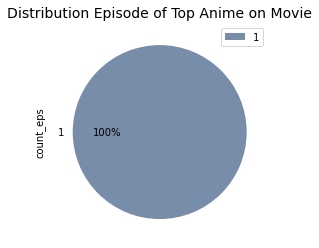

In [52]:
colors = ['#778da9', 'silver', 'steelblue']


eps_good.groupby(['eps']).sum().plot(
    kind='pie', y='count_eps', autopct='%1.0f%%', colors=colors)
plt.title('Distribution Episode of Top Anime on Movie',fontsize=14)
plt.show()

Konklusi :
    
Anime yang memiliki rating >3,5 pada media penayangan Movie, seluruhnya hanya memiliki 1 episode saja 

### # Duration

In [53]:
## Hitung banyak judul anime berdasarkan duration

duration_best = (df_movie
    .groupby('duration')
    .agg(count_duration=('duration','count'))
    .reset_index())

duration_best = duration_best.sort_values(['count_duration'], ascending=[False])
duration_best = duration_best.head()
duration_best

,duration,count_duration
31,60,14
86,120,11
78,111,10
67,100,10
77,110,10


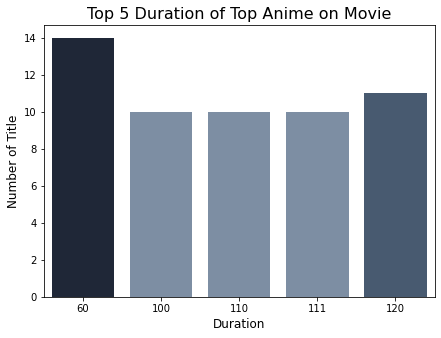

In [54]:
## Distribusi `duration` pada top anime Movie

color = ['#1b263b','#778da9','#778da9','#778da9','#415a77']
plt.figure(figsize=(7,5))
sns.barplot(y=duration_best['count_duration'], x=duration_best['duration'], palette=color)
plt.title('Top 5 Duration of Top Anime on Movie', fontsize=16)
plt.xlabel('Duration', fontsize = 12)
plt.ylabel('Number of Title', fontsize = 12)
plt.show()

Konklusi : 

Anime pada media penayangan Movie dengan rating tinggi (>3,5) mayoritas memiliki distribusi durasi selama 60 menit dan 100-120 menit

### # Content Warning

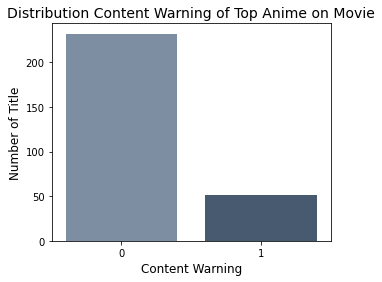

In [55]:
## Distribusi `contentWarn` pada top anime Movie

plt.figure(figsize=(5,4))
sns.countplot(x=df_movie['contentWarn'], palette=['#778da9','#415a77'])
plt.title('Distribution Content Warning of Top Anime on Movie', fontsize=14)
plt.xlabel('Content Warning', fontsize = 12)
plt.ylabel('Number of Title', fontsize = 12)
plt.show()

Konklusi :

Anime pada media penayangan Movie dengan rating tinggi (>3,5) mayoritas tidak memiliki Content Warning

### # Tags / Genre

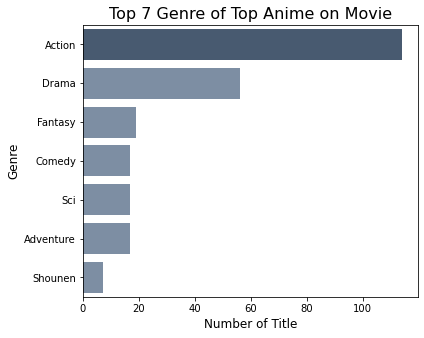

In [56]:
## Distribusi `contentWarn` pada top anime Movie

color = ['#415a77', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9']

plt.figure(figsize=(6,5))
sns.countplot(y = df_movie['tags'], order=pd.value_counts(df_movie['tags']).iloc[:7].index, palette = color)
plt.title('Top 7 Genre of Top Anime on Movie', fontsize=16)
plt.xlabel('Number of Title', fontsize = 12)
plt.ylabel('Genre', fontsize = 12)
plt.show()

Konklusi :

Anime pada media penayangan Movie dengan rating tinggi (>3,5) mayoritas memiliki genre Action

## 4) Bagaimana ciri anime yang tidak banyak ditonton ?

In [57]:
## Hitung jumlah penonton suatu anime (Sudah menonton + Sedang menonton + Ingin menonton)

df_2011['total_watch'] = (df_2011['watched']+df_2011['watching']+df_2011['wantWatch'])
df_2011.head()

,title,mediaType,eps,duration,startYr,finishYr,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,total_watch
1,your name.,Movie,1,107,2016,2016,Drama,0,58831,1453,21733,124,4.663,43960,82017
2,A Silent Voice,Movie,1,130,2016,2016,Drama,1,45892,946,17148,132,4.661,33752,63986
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10,8,2016,2016,Shounen,0,25134,2183,8082,167,4.660,17422,35399
4,Attack on Titan 3rd Season: Part II,TV,10,8,2019,2019,Action,1,21308,3217,7864,174,4.650,15789,32389
5,Demon Slayer: Kimetsu no Yaiba,TV,26,8,2019,2019,Action,1,28708,10844,13156,600,4.647,24765,52708


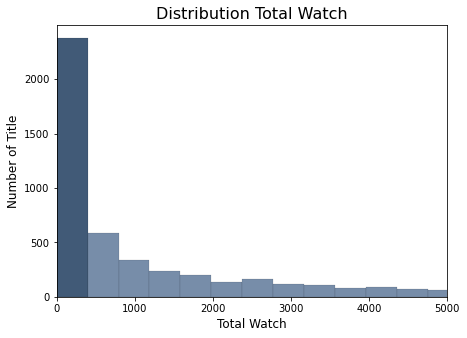

In [58]:
## Distribusi Total Watch

plt.figure(figsize=(7,5))
ax = sns.histplot(data = df_2011, x = 'total_watch', color='#778da9', alpha=1)
ax.patches[0].set_facecolor('#415a77')
plt.xlim(0,5000)
plt.title('Distribution Total Watch', fontsize=16)
plt.xlabel('Total Watch', fontsize = 12)
plt.ylabel('Number of Title', fontsize = 12)
plt.show()

Konklusi :

Jika dilihat dari distribusi datanya, banyak anime yang memiliki penonton kurang dari 500.

Maka akan dilakukan analisa terhadap anime dengan penonton kurang dari 500.

In [59]:
## Buat Dataset dengan total penonton < 500

df_watch_less = df_2011[(df_2011['total_watch'] < 500)]

### # Media Type

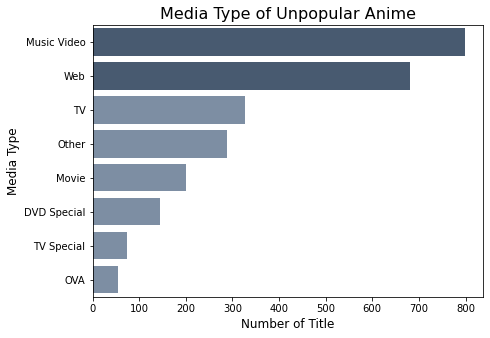

In [60]:
## Media Type dari anime dengan penonton < 500

color = ['#415a77', '#415a77', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9']
plt.figure(figsize=(7,5))
sns.countplot(y = df_watch_less['mediaType'], order=pd.value_counts(df_watch_less['mediaType']).index, palette = color)
plt.title('Media Type of Unpopular Anime', fontsize=16)
plt.xlabel('Number of Title', fontsize = 12)
plt.ylabel('Media Type', fontsize = 12)
plt.show()

Konklusi :

- Anime yang memiliki jumlah penonton kurang dari 500, mayoritas jenis media penayangan Music Video dan Web

Maka, akan dilihat pola data anime pada media Music Video dan Web

In [61]:
## Update Dataset df_watch_less menjadi hanya Music Video

df_watch_less = df_watch_less[ (df_watch_less['mediaType'] == 'Music Video') | (df_watch_less['mediaType'] == 'Web') ].reset_index(drop = True)

### # Episode

In [62]:
## Hitung banyak judul anime berdasarkan jumlah episodenya

eps_bad = (df_watch_less
    .groupby('eps')
    .agg(count_eps=('eps','count'))
    .reset_index())

eps_bad = eps_bad.sort_values(['count_eps'], ascending=[False])
eps_bad = eps_bad.head()
eps_bad

,eps,count_eps
0,1,1190
1,2,37
2,3,32
11,12,31
3,4,30


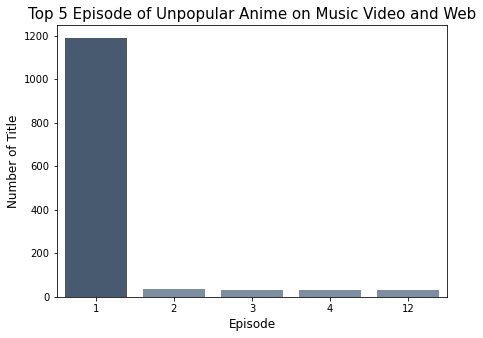

In [63]:
## Distribusi `eps` pada anime dengan penonton < 500

color = ['#415a77','#778da9','#778da9','#778da9','#778da9']
plt.figure(figsize=(7,5))
sns.barplot(y=eps_bad['count_eps'],x=eps_bad['eps'], palette=color)
plt.title('Top 5 Episode of Unpopular Anime on Music Video and Web', fontsize=15)
plt.xlabel('Episode', fontsize = 12)
plt.ylabel('Number of Title', fontsize = 12)
plt.show()

Konklusi :
    
Anime yang memiliki jumlah penonton kurang dari 500, mayoritas memiliki 1 episode saja 

### # Duration

In [64]:
## Hitung banyak judul anime berdasarkan duration

duration_bad = (df_watch_less
    .groupby('duration')
    .agg(count_duration=('duration','count'))
    .reset_index())

duration_bad = duration_bad.sort_values(['count_duration'], ascending=[False])
duration_bad = duration_bad.head()
duration_bad

,duration,count_duration
3,4,414
4,5,216
1,2,200
2,3,198
0,1,166


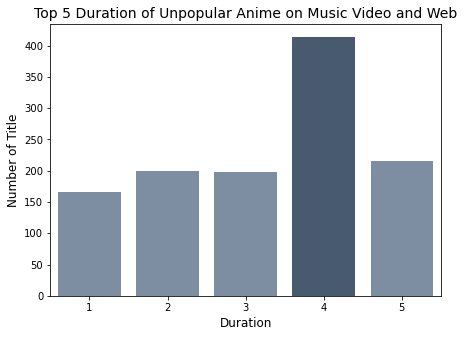

In [65]:
## Distribusi `duration` pada anime dengan penonton < 500

color = ['#778da9','#778da9','#778da9','#415a77','#778da9']
plt.figure(figsize=(7,5))
sns.barplot(y=duration_bad['count_duration'], x=duration_bad['duration'], palette=color)
plt.title('Top 5 Duration of Unpopular Anime on Music Video and Web', fontsize=14)
plt.xlabel('Duration', fontsize = 12)
plt.ylabel('Number of Title', fontsize = 12)
plt.show()

Konklusi :
    
Anime yang memiliki jumlah penonton kurang dari 500, mayoritas berdurasi kurang dari 5 menit

### # Content Warning

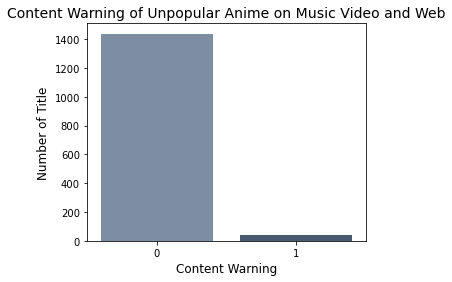

In [66]:
## Distribusi `contentWarn` pada top anime Movie

plt.figure(figsize=(5,4))
sns.countplot(x=df_watch_less['contentWarn'], palette=['#778da9','#415a77'])
plt.title('Content Warning of Unpopular Anime on Music Video and Web', fontsize=14)
plt.xlabel('Content Warning', fontsize = 12)
plt.ylabel('Number of Title', fontsize = 12)
plt.show()

Konklusi :

Anime pada media penayangan Movie dengan rating tinggi (>3,5) mayoritas tidak memiliki Content Warning

### # Tags / Genre

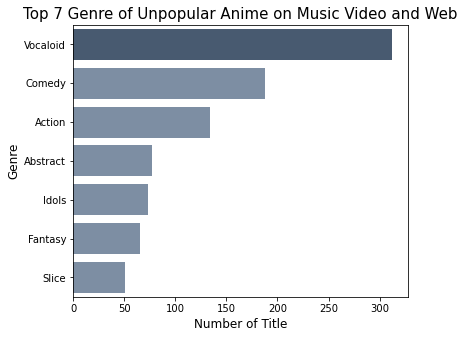

In [67]:
## Distribusi `contentWarn` pada top anime Movie

color = ['#415a77', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9', '#778da9']
plt.figure(figsize=(6,5))
sns.countplot(y = df_watch_less['tags'], order=pd.value_counts(df_watch_less['tags']).iloc[:7].index, palette = color)
plt.title('Top 7 Genre of Unpopular Anime on Music Video and Web', fontsize=15)
plt.xlabel('Number of Title', fontsize = 12)
plt.ylabel('Genre', fontsize = 12)
plt.show()

Konklusi :

Anime yang memiliki jumlah penonton kurang dari 500, mayoritas memiliki genre Vocaloid

# Data Preprocessing

## 11. Feature Selection

### 11.1 Training Data

### a. Numerical Data

Dari Analisa Correlation Heatmap (9.1), dapat dipilih beberapa feature yang memiliki korelasi terhadap target variabel (`rating`). Pada kasus ini akan dipilih feature yang memiliki korelasi >0.2 terhadap target variabel. Feature tersebut antara lain :
   1. `wantWatch`, dengan korelasi sebesar 0,53
   2. `watched`, dengan korelasi sebesar 0,42
   3. `votes`, dengan korelasi sebesar 0,42
   4. `watching`, dengan korelasi sebesar 0,36
   5. `dropped`, dengan korelasi sebesar 0,29
   6. `duration`, dengan korelasi sebesar 0,26

In [68]:
## Buat daftar numerical
numerical_final = ['wantWatch','watched','votes','watching','duration','dropped','rating']

### b. Categorical Data
Kolom `tags` tidak akan digunakan untuk membuat model, karena memiliki terlalu banyak unqie values

In [69]:
## Encod Categorical Data

cat = X_train['mediaType']
cat = pd.get_dummies(cat)
cat_corr = pd.concat([cat,X_train["rating"]],axis=1)
cat_corr.head()

,DVD Special,Movie,Music Video,OVA,Other,TV,TV Special,Web,rating
1482,0,0,0,1,0,0,0,0,3.983
2590,0,0,0,0,0,1,0,0,3.714
2946,0,1,0,0,0,0,0,0,3.634
7935,0,0,0,0,0,1,0,0,2.568
6367,0,0,0,1,0,0,0,0,2.902


In [70]:
## Tampilkan Korelasi `mediaType` terhadap `rating
corr = pd.DataFrame(cat_corr.corr()["rating"]).rename(columns=({'rating':'correlation'
                                                       })).sort_values("correlation",ascending=False)

## Pilih yang memiliki korelasi > +-0.1
corr = corr[(corr["correlation"]<=-0.1) | (corr['correlation']>=0.1)]
corr

,correlation
rating,1.000000
TV,0.198083
Other,-0.119037
Web,-0.185367
Music Video,-0.220193


Konklusi :

Maka akan dipilih 2 jenis media yang memiliki korelasi tertinggi (positif maupun negative) terhadap target variabel . Yaitu TV dan Music Video 

In [71]:
## Buat daftar Categorical
categorical_final = cat[['TV','Music Video']]

In [72]:
## Gabungkan data X_train
X_train = pd.concat([X_train[numerical_final],categorical_final],axis=1)

## Drop `rating`
X_train.drop(['rating'], axis = 'columns', inplace = True)
X_train.head()

,wantWatch,watched,votes,watching,duration,dropped,TV,Music Video
1482,1353,1221,827,153,39,25,0,0
2590,9816,30529,23330,1336,8,1999,1,0
2946,423,261,168,11,8,8,0,0
7935,1071,21916,14528,369,8,2347,1,0
6367,510,354,213,15,33,20,0,0


### 11.2 Testing Data

In [73]:
## Encod Categorical Data
X_test = pd.get_dummies(X_test,columns=['mediaType'])

In [74]:
## Delete Unsude MediaType
X_test.drop(['mediaType_DVD Special', 'mediaType_TV Special','mediaType_OVA','mediaType_Other','mediaType_Web','mediaType_Movie'], axis = 'columns', inplace = True)

In [75]:
## Rename
X_test.rename(columns={'mediaType_Music Video': 'Music Video', 'mediaType_TV': 'TV'}, inplace=True)

In [76]:
X_test.head()

,eps,duration,startYr,finishYr,tags,contentWarn,watched,watching,wantWatch,dropped,votes,Music Video,TV
7543,1,8,2007,2007,Adventure,0,17,0,22,0,11,0,0
10967,2,5,2018,2018,Ecchi,1,268,13,243,3,176,0,0
4996,1,15,1997,1997,Abstract,0,1053,15,654,14,784,0,0
4330,26,8,2019,2019,Idols,0,94,45,225,13,81,0,1
3636,2,8,2007,2008,BL,1,5911,115,1479,60,3738,0,0


In [77]:
## Ubah data X_test
X_test = X_test[X_train.columns]
X_test.head()

,wantWatch,watched,votes,watching,duration,dropped,TV,Music Video
7543,22,17,11,0,8,0,0,0
10967,243,268,176,13,5,3,0,0
4996,654,1053,784,15,15,14,0,0
4330,225,94,81,45,8,13,1,0
3636,1479,5911,3738,115,8,60,0,0


## 12. Multicollinearity Check

In [78]:
# Hitung VIF Score
X = add_constant(X_train)

vif_bank = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_bank.columns = ['feature','vif_score']
vif_bank = vif_bank.loc[vif_bank.feature!='const']
vif_bank

,feature,vif_score
1,wantWatch,4.801654
2,watched,142.845145
3,votes,176.649273
4,watching,3.534356
5,duration,1.266021
6,dropped,3.392973
7,TV,1.508010
8,Music Video,1.139092


Konklusi :

Terdapat beberapa features yang memiliki VIF score tinggi (>4), maka ada beberapa feature yang saling berkorelasi. Untuk mengetahui feautre apa saja yang saling berkorelasi dapat menggunakan heatmap.

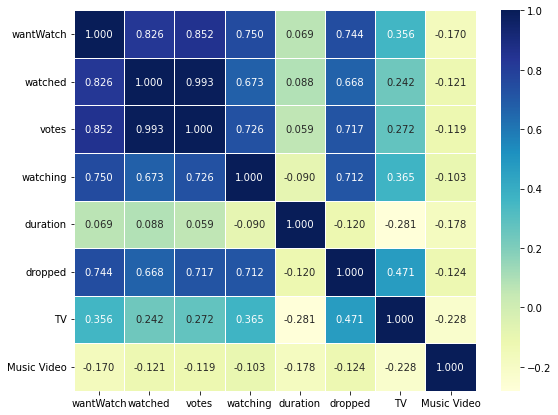

In [79]:
fig, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(X_train.corr(),cbar=True,annot=True,linewidths=0.5,ax=ax,fmt='.3f',cmap="YlGnBu")
plt.show()

Konklusi :

Feature yang saling berkorelasi tinggi (>8)
1. `watched` dan `wantWatch`
2. `votes` dan `wantWatch`
3. `votes` dan `watched`

Maka, akan dihapus feature yang saling berkorelasi tinggi. Hapus beberapa feature saja, dengan ketentuan feature yang memiliki nilai korelasi dengan target variabel yang paling rendah. Maka hapus feature `votes` dan `watched`

In [80]:
## Drop selected feature 
X_train.drop(['votes','watched'], axis = 'columns', inplace = True)
X_test.drop(['votes','watched'], axis = 'columns', inplace = True)

In [81]:
# Hitung ulang VIF Score
X = add_constant(X_train)

vif_bank = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_bank.columns = ['feature','vif_score']
vif_bank = vif_bank.loc[vif_bank.feature!='const']
vif_bank

,feature,vif_score
1,wantWatch,3.129102
2,watching,2.656713
3,duration,1.246089
4,dropped,2.834514
5,TV,1.478145
6,Music Video,1.134857


## 13. Feature Transformation

In [82]:
# Pilih feature yang akan di log transform (Dari analisa 8.2)
feature_t = ['wantWatch','watching','duration','dropped']

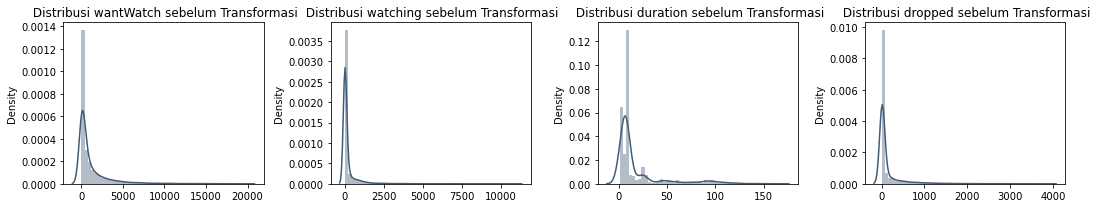

In [83]:
plt.figure(figsize=(15,3))

for x in range(0, len(feature_t)):
    plt.subplot(1, len(feature_t), x+1)
    sns.distplot(x=X_train[feature_t[x]], color='#415a77')
    plt.title(f' Distribusi {feature_t[x]} sebelum Transformasi')
    plt.tight_layout()

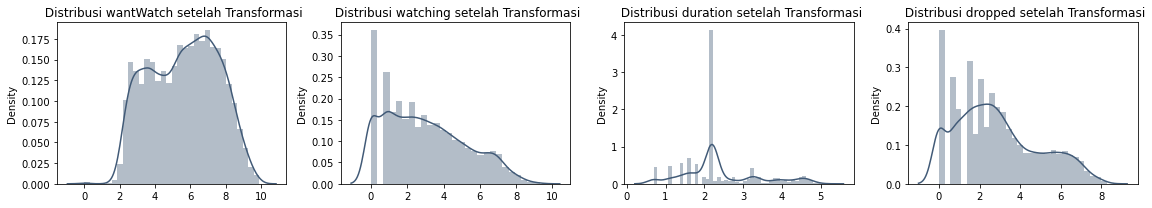

In [84]:
plt.figure(figsize=(16,3))

for x in range(0, len(feature_t)):
    plt.subplot(1, len(feature_t), x+1)
    sns.distplot(x=np.log1p(X_train[feature_t[x]]), color='#415a77')
    plt.title(f' Distribusi {feature_t[x]} setelah Transformasi')
    plt.tight_layout()

## 14. Feature Scaling

### 14.1 Training Data 

In [85]:
scaler = StandardScaler()

In [86]:
## Sebelum Scaler
X_train.head()

,wantWatch,watching,duration,dropped,TV,Music Video
1482,1353,153,39,25,0,0
2590,9816,1336,8,1999,1,0
2946,423,11,8,8,0,0
7935,1071,369,8,2347,1,0
6367,510,15,33,20,0,0


In [87]:
## Select feature
feature_s = ['wantWatch','watching','duration','dropped']

In [88]:
X_train[feature_s] = scaler.fit_transform(X_train[feature_s])

In [89]:
## Sesudah Scaler
X_train.head()

,wantWatch,watching,duration,dropped,TV,Music Video
1482,0.080996,-0.086546,0.773963,-0.316179,0,0
2590,4.031071,1.706799,-0.397599,5.160044,1,0
2946,-0.353078,-0.301808,-0.397599,-0.363340,0,0
7935,-0.050626,0.240895,-0.397599,6.125458,1,0
6367,-0.312471,-0.295745,0.547209,-0.330049,0,0


### 14.2 Testing Data 

In [90]:
## Sebelum Scaler
X_test.head()

,wantWatch,watching,duration,dropped,TV,Music Video
7543,22,0,8,0,0,0
10967,243,13,5,3,0,0
4996,654,15,15,14,0,0
4330,225,45,8,13,1,0
3636,1479,115,8,60,0,0


In [91]:
X_test[feature_s] = scaler.fit_transform(X_test[feature_s])

In [92]:
## Sesudah Scaler
X_test.head()

,wantWatch,watching,duration,dropped,TV,Music Video
7543,-0.524839,-0.184943,-0.386907,-0.338661,0,0
10967,-0.432491,-0.175732,-0.502942,-0.332407,0,0
4996,-0.260748,-0.174316,-0.116157,-0.309474,0,0
4330,-0.440012,-0.153061,-0.386907,-0.311559,1,0
3636,0.083992,-0.103468,-0.386907,-0.213576,0,0


# Modeling Data

## 15 Linier Regression

### 15.1 Normal Regression

### a. Training Model

In [93]:
## Define The Model
multi_reg = LinearRegression()

## Train The Model
X_train_rating = X_train.to_numpy()
y_train_rating = y_train.to_numpy()
y_train_rating = y_train_rating.reshape(len(y_train_rating,))

multi_reg.fit(X_train_rating, y_train_rating)

LinearRegression()

In [94]:
## Retrieve The Coefficients

data = X_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,2.901883
1,wantWatch,0.512348
2,watching,0.010911
3,duration,0.176442
4,dropped,-0.183126
5,TV,0.209981
6,Music Video,-0.211591


Interpretation :

Setiap penambahan 1 poin pada `wantWatch` dengan kondisi parameter lain bernilai tetap, maka akan meningkatkan `rating` sebesar 0.512 poin

### b. Model Diagnostic

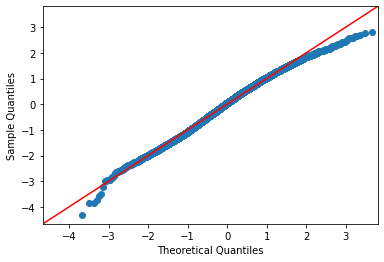

In [95]:
## QQplot

y_train_predict = multi_reg.predict(X_train_rating)
residual = y_train_rating - y_train_predict

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

sm.qqplot(std_resid, line='45')
plt.show()

Konklusi :

Distribusi dari residual plot cukup normal meskipun tidak terlalu ideal karena di bagian residual yang nilainya kecil dan besar sedikit menyimpang. Namun secara garis besar distribusinya sudah berhimpitan dengan garis linier regresi

In [96]:
## R2-Score

print('R-squared for training data is {}'.format(r2_score(y_train_rating, y_train_predict)))

R-squared for training data is 0.3696755911327435


Konklusi :

36,9% dari total variabilitas `rating` berhasil dimodelkan menggunakan fitur yang digunakan. Maka, model Normal Linier Regresion kurang optimal dalam memodelkan pola yang ada dalam dataset. Tidak akan diambil insight maupun deployment dari model ini.

### c. Model Evaluation

#### Train Data

In [97]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train_rating, y_train_predict))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train_rating, y_train_predict)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train_rating, y_train_predict)))

RMSE for training data is 0.6550416383888714
MAE for training data is 0.5366165937076495
MAPE for training data is 0.21499741523581156


#### Test Data

In [98]:
## Prepare prediction result on test data
X_test_rating = X_test.to_numpy()
y_test_predict = multi_reg.predict(X_test_rating)

## Ground truth target
y_test_rating = y_test.to_numpy()
y_test_rating = y_test_rating.reshape(len(y_test_rating),)

In [99]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test_rating, y_test_predict))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test_rating, y_test_predict)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test_rating, y_test_predict)))

RMSE for testing data is 0.6540605231911427
MAE for testing data is 0.5329553824439418
MAPE for testing data is 0.21243565690587238


Konklusi :

- RMSE = Standar deviasi dari prediksi error pada data test memiliki nilai sebesar 0,655. Maka, residualnya menyimpang sebesar 0,655 dari garis linier regresi
- MAE = Pada data test, secara rata-rata prediksi rating yang dihasilkan menyimpang dari rating sesungguhnya sebesar ±0,533
- MAPE = Pada data test, secara rata-rata prediksi rating yang dihasilkan menyimpang dari rating sesungguhnya sebesar ±21,20%
- Dilihat dari nilai MAPE pada data train dan test, keduanya memiliki nilai error yang tidak cukup tinggi (<30 %), maka dapat dinyatakn bahwa model normal regresion tidak mengalami underfitting maupun overfitting


- Namun karena nilai R2-Score pada Model Normal Regression sangat rendah, maka model ini hanya akan digunakan sebagai base line model lain

### 15.2 Ridge Regression

### a. Training Model

In [100]:
## Define The Model

ridge_reg = Ridge(random_state=42)

In [101]:
# Hyperparameter Tuning Lambda (Alpha)

parameters = {
    'alpha': (0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10)
}

ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train_rating, y_train_rating)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10)},
             scoring='neg_root_mean_squared_error')

In [102]:
# Show Best Alpha for RMSE

retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
7,{'alpha': 10},-0.655842,1
6,{'alpha': 5},-0.655846,2
5,{'alpha': 1},-0.655850,3
4,{'alpha': 0.1},-0.655851,4
3,{'alpha': 0.01},-0.655851,5
2,{'alpha': 0.001},-0.655851,6
1,{'alpha': 0.0001},-0.655851,7
0,{'alpha': 1e-05},-0.655851,8


**Konklusi** : 

- Metode Ridge dengan alpha = 10 mempunyai nilai RMSE paling kecil (hiraukan tanda negative), maka alpha = 10 merupakan merupakan lamda terbaik untuk Ridge.
- Nilai RMSE Ridge dengan Lambda = 10, adalah 0,655

In [103]:
# Show coefficient

rigde_best = ridge_reg_gridcv.best_estimator_

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[rigde_best.intercept_] + list(rigde_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,2.902131
1,wantWatch,0.510354
2,watching,0.011513
3,duration,0.176551
4,dropped,-0.181434
5,TV,0.208553
6,Music Video,-0.209290


Interpretation :

Setiap penambahan 1 poin pada `wantWatch` dengan kondisi parameter lain bernilai tetap, maka akan meningkatkan `rating` sebesar 0.510 poin

### b. Model Diagnostic

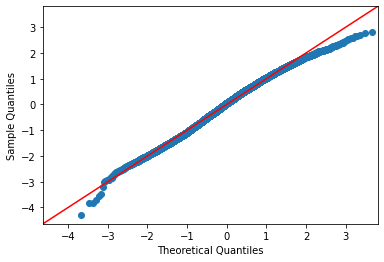

In [104]:
## QQplot

y_train_predict_ridge = rigde_best.predict(X_train_rating)
residual = y_train_rating - y_train_predict_ridge

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

sm.qqplot(std_resid, line='45')
plt.show()

Konklusi :

Distribusi dari residual plot cukup normal meskipun tidak terlalu ideal karena di bagian residual yang nilainya kecil dan besar sedikit menyimpang. Namun secara garis besar distribusinya sudah berhimpitan dengan garis linier regresi

In [105]:
## R2-Score

print('R-squared for training data is {}'.format(r2_score(y_train_rating, y_train_predict_ridge)))

R-squared for training data is 0.36967182246269226


Konklusi :

36,9% dari total variabilitas `rating` berhasil dimodelkan menggunakan fitur yang digunakan. Maka, model Ridge kurang optimal dalam memodelkan pola yang ada dalam dataset. Tidak akan diambil insight maupun deployment dari model ini.

### c. Model Evaluation

#### Train Data

In [106]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train_rating, y_train_predict_ridge))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train_rating, y_train_predict_ridge)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train_rating, y_train_predict_ridge)))

RMSE for training data is 0.6550435966123515
MAE for training data is 0.5367013192556531
MAPE for training data is 0.21505757408616646


#### Test Data

In [107]:
## Prepare prediction result on test data
X_test_rating_ridge = X_test.to_numpy()
y_test_predict_ridge = rigde_best.predict(X_test_rating)

## Ground truth target
y_test_rating_ridge = y_test.to_numpy()
y_test_rating_ridge = y_test_rating_ridge.reshape(len(y_test_rating_ridge),)

In [108]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test_rating_ridge, y_test_predict_ridge))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test_rating_ridge, y_test_predict_ridge)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test_rating_ridge, y_test_predict_ridge)))

RMSE for testing data is 0.6540468642887115
MAE for testing data is 0.5330551238880773
MAPE for testing data is 0.21250678193142256


Konklusi :

- RMSE = Standar deviasi dari prediksi error pada data test memiliki nilai sebesar 0,655. Maka, residualnya menyimpang sebesar 0,655 dari garis linier regresi
- MAE = Pada data test, secara rata-rata prediksi rating yang dihasilkan menyimpang dari rating sesungguhnya sebesar ±0,533
- MAPE = Pada data test, secara rata-rata prediksi rating yang dihasilkan menyimpang dari rating sesungguhnya sebesar ±21,21%
- Dilihat dari nilai MAPE pada data train dan test, keduanya memiliki nilai error yang tidak cukup tinggi (<30 %), maka dapat dinyatakn bahwa model Ridge tidak mengalami underfitting maupun overfitting


- Namun karena nilai R2-Score pada Model Ridge sangat rendah, maka model ini hanya akan digunakan sebagai base line model lain

### 15.3 LASSO

### a. Training Model

In [109]:
## Define The Model

lasso_reg = Lasso(max_iter=10000, random_state=42)

In [110]:
# Hyperparameter Tuning Lambda (Alpha)

parameters = {
    'alpha': (0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10)
}

lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train_rating, y_train_rating)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid={'alpha': (1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10)},
             scoring='neg_root_mean_squared_error')

In [111]:
# Show Best Alpha for RMSE

retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
2,{'alpha': 0.001},-0.655836,1
1,{'alpha': 0.0001},-0.655847,2
0,{'alpha': 1e-05},-0.655851,3
3,{'alpha': 0.01},-0.657536,4
4,{'alpha': 0.1},-0.685205,5
5,{'alpha': 1},-0.825089,6
6,{'alpha': 5},-0.825089,6
7,{'alpha': 10},-0.825089,6


**Konklusi** : 

- Metode LASSO dengan alpha = 0,001 mempunyai nilai RMSE paling kecil (hiraukan tanda negative), maka alpha = 0,001 merupakan merupakan lamda terbaik untuk LASSO.
- Nilai RMSE LASSO dengan Lambda = 0,001, adalah 0,655

In [112]:
# Show coefficient

lasso_best = lasso_reg_gridcv.best_estimator_

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,2.902969
1,wantWatch,0.510378
2,watching,0.008606
3,duration,0.175745
4,dropped,-0.177420
5,TV,0.203930
6,Music Video,-0.202213


Interpretation :

Setiap penambahan 1 poin pada `wantWatch` dengan kondisi parameter lain bernilai tetap, maka akan meningkatkan `rating` sebesar 0.510 poin

### b. Model Diagnostic

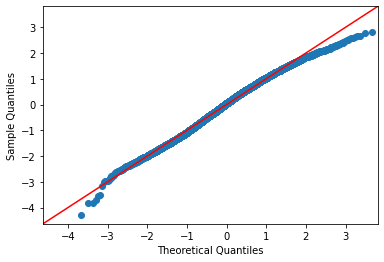

In [113]:
## QQplot

y_train_predict_LASSO = lasso_best.predict(X_train_rating)
residual = y_train_rating - y_train_predict_LASSO

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

sm.qqplot(std_resid, line='45')
plt.show()

Konklusi :

Distribusi dari residual plot cukup normal meskipun tidak terlalu ideal karena di bagian residual yang nilainya kecil dan besar sedikit menyimpang. Namun secara garis besar distribusinya sudah berhimpitan dengan garis linier regresi

In [114]:
## R2-Score

print('R-squared for training data is {}'.format(r2_score(y_train_rating, y_train_predict_LASSO)))

R-squared for training data is 0.36963733370662444


Konklusi :

36,9% dari total variabilitas `rating` berhasil dimodelkan menggunakan fitur yang digunakan. Maka, model LASSO kurang optimal dalam memodelkan pola yang ada dalam dataset. Tidak akan diambil insight maupun deployment dari model ini.

### c. Model Evaluation

#### Train Data

In [115]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train_rating, y_train_predict_LASSO))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train_rating, y_train_predict_LASSO)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train_rating, y_train_predict_LASSO)))

RMSE for training data is 0.655061516904195
MAE for training data is 0.5368899772721504
MAPE for training data is 0.21515672970015046


#### Test Data

In [116]:
## Prepare prediction result on test data
X_test_rating_LASSO = X_test.to_numpy()
y_test_predict_LASSO = lasso_best.predict(X_test_rating)

## Ground truth target
y_test_rating_LASSO = y_test.to_numpy()
y_test_rating_LASSO = y_test_rating_LASSO.reshape(len(y_test_rating_LASSO),)

In [117]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test_rating_LASSO, y_test_predict_LASSO))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test_rating_LASSO, y_test_predict_LASSO)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test_rating_LASSO, y_test_predict_LASSO)))

RMSE for testing data is 0.6542823228959338
MAE for testing data is 0.5333079623660874
MAPE for testing data is 0.21260202145303864


Konklusi :

- RMSE = Standar deviasi dari prediksi error pada data test memiliki nilai sebesar 0,654. Maka, residualnya menyimpang sebesar 0,654 dari garis linier regresi
- MAE = Pada data test, secara rata-rata prediksi rating yang dihasilkan menyimpang dari rating sesungguhnya sebesar ±0,533
- MAPE = Pada data test, secara rata-rata prediksi rating yang dihasilkan menyimpang dari rating sesungguhnya sebesar ±21,21%
- Dilihat dari nilai MAPE pada data train dan test, keduanya memiliki nilai error yang tidak cukup tinggi (<30 %), maka dapat dinyatakn bahwa model LASSO tidak mengalami underfitting maupun overfitting

- Namun karena nilai R2-Score pada Model LASSO sangat rendah, maka model ini hanya akan digunakan sebagai base line model lain

## 16. Random Forest Regression

### a. Training Model

In [118]:
## Define The Model

rf_rgs = RandomForestRegressor(random_state=42)

In [119]:
%%time
## Hyperparameter Tuning

parameters = {
    'n_estimators': (30,40,50,60),
    'max_depth':(5,7,9,11)
}

rf_rgs_rscv = RandomizedSearchCV(rf_rgs, parameters, cv=5, scoring='neg_root_mean_squared_error',n_iter = 10)
rf_rgs_rscv.fit(X_train_rating, y_train_rating)

CPU times: total: 32 s
Wall time: 34.5 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': (5, 7, 9, 11),
                                        'n_estimators': (30, 40, 50, 60)},
                   scoring='neg_root_mean_squared_error')

In [120]:
## Show Best Parameters for RMSE

cv_result = pd.DataFrame(rf_rgs_rscv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'n_estimators': 60, 'max_depth': 9}",-0.493011,1
1,"{'n_estimators': 50, 'max_depth': 9}",-0.493543,2
8,"{'n_estimators': 40, 'max_depth': 9}",-0.493970,3
5,"{'n_estimators': 30, 'max_depth': 9}",-0.494511,4
0,"{'n_estimators': 40, 'max_depth': 11}",-0.496128,5
3,"{'n_estimators': 30, 'max_depth': 11}",-0.496545,6
7,"{'n_estimators': 60, 'max_depth': 7}",-0.500641,7
9,"{'n_estimators': 30, 'max_depth': 7}",-0.502043,8
4,"{'n_estimators': 50, 'max_depth': 5}",-0.525619,9
2,"{'n_estimators': 40, 'max_depth': 5}",-0.526048,10


Konklusi :

- Model Random Forest Regression dengan n_estimators (jumlah decision tree) = 60, dan max_depth (ketinggian max dari decision tree) = 9 mempunyai nilai RMSE paling kecil (hiraukan tanda negative), parameter tersebut merupakan parameter terbaik untuk Model Random Forest Regression.
- Nilai RMSE Random Forest Regression dengan n_estimators = 60 dan max_depth = 9 adalah 0,493
- Model Random Forest Regression lebih baik daripada model Linier Regression, karena nilai RMSE nya lebih kecil

### b. Model Diagnostic

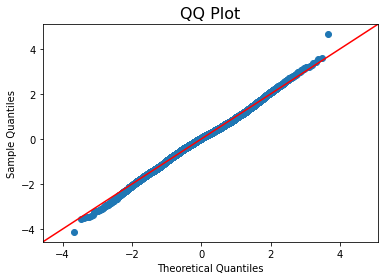

In [121]:
## QQplot

rf_best = rf_rgs_rscv.best_estimator_

y_train_predict_rf = rf_best.predict(X_train_rating)
residual = y_train_rating - y_train_predict_rf

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

sm.qqplot(std_resid, line='45')
plt.title('QQ Plot', fontsize=16)
plt.show()

Konklusi :

Distribusi dari residual plot sudah sangat baik karena hampir seluruh data berhimpitan dengan garis linier regresi. Hanya saja pada data terbesar dan terkecil masih menyimpang dari garis linier regresi

In [122]:
## R2-Score

print('R-squared for training data is {}'.format(r2_score(y_train_rating, y_train_predict_rf)))

R-squared for training data is 0.7347444708102255


Konklusi :

73,45% dari total variabilitas `rating` berhasil dimodelkan menggunakan fitur yang digunakan. Maka, model Model Random Forest Regression cukup optimal dalam memodelkan pola yang ada dalam dataset.

### c. Model Evaluation

#### Train Data

In [123]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train_rating, y_train_predict_rf))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train_rating, y_train_predict_rf)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train_rating, y_train_predict_rf)))

RMSE for training data is 0.42493163796204364
MAE for training data is 0.330025992904948
MAPE for training data is 0.1318164434594297


#### Test Data

In [124]:
## Prepare prediction result on test data
X_test_rating_rf = X_test.to_numpy()
y_test_predict_rf = rf_best.predict(X_test_rating)

## Ground truth target
y_test_rating_rf = y_test.to_numpy()
y_test_rating_rf = y_test_rating_rf.reshape(len(y_test_rating_rf),)

In [125]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test_rating_rf, y_test_predict_rf))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test_rating_rf, y_test_predict_rf)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test_rating_rf, y_test_predict_rf)))

RMSE for testing data is 0.5969875624019764
MAE for testing data is 0.4702073093793112
MAPE for testing data is 0.20236185978674023


Konklusi :

- Standar deviasi dari prediksi error (RMSE) pada test data adalah 0,603, maka residualnya menyimpang sebesar 0,603 dari garis linier regresi
- MAE = Pada data test, secara rata-rata prediksi rating yang dihasilkan menyimpang dari rating sesungguhnya sebesar ±0,474
- MAPE = Pada data test, secara rata-rata prediksi rating yang dihasilkan menyimpang dari rating sesungguhnya sebesar ±20,4%


- Nilai MAPE pada data train lebih kecil daripada data test, dengan selisih  ±7%. Maka dapat dinyatakan bahwa Model Random Forest Regression mengalami overfitting, namun tidak terlalu besar. 
- Model ini akan tetap digunakan karena nilai errornya (MAPE) masih lebih kecil daripada Model Linier Regression 

### d. Feature Important

In [126]:
## Check feature important from Random Forest Model

rf_rgs.fit(X_train,y_train)
feature_name_list = X_train.columns
rf_rgs.feature_names = feature_name_list
rf_df= pd.DataFrame({'feature': rf_rgs.feature_names,'importance':rf_rgs.feature_importances_})
rf_df.sort_values(['importance'], ascending=[False])

,feature,importance
0,wantWatch,0.608388
3,dropped,0.135666
1,watching,0.130115
2,duration,0.105608
5,Music Video,0.010521
4,TV,0.009701


Konklusi : 

Berdasarkan Feature Important pada Random Forest, tiga faktor terpenting yang mempengaruhi `rating` anime adalah :
1. wantWatch = Anime yang masuk dalam daftar akan dintonton seorang user
2. dropped = Anime yang tidak lanjut ditonton oleh user
3. watching = Anime yang sedang ditonton oleh user

# Recommendation

## 17. Recommendation

1. Pada 10 tahun terakhir (2011-2020) media penayangan anime yang memiliki rata-rata rating tertinggi adalah Movie, dengan nilai sebesar 3,5.


2. Ciri anime yang memiliki rating > 3,5 dengan media penayangan Movie pada 10 tahun terakhir, adalah:
- Terdiri dari 1 episode
- Berdurasi selama 1-2 jam
- Bergenre Action
- Tidak mengandung Content Warning, (dapat ditonton semua usia)


3. Ciri anime yang tidak banyak dintonton pada 10 tahun terakhir, adalah : 
- Memiliki media penayangan Music Video atau Web
- Terdiri dari 1 episode dengan durasi < 5 menit 
- Bergenre Vocaloid (video klip)


4. Model terbaik dalam memprediksi rating anime adalah Random Forest Regression dengan parameter n_estimators = 60 dan max_depth = 9. Dengan nilai MAPE pada data test sebesar 20%, maka diharapkan model ini mampu memprediksi rating anime dengan ketepatan sebesar 80%.